In [138]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
from sklearn.model_selection import cross_val_score,StratifiedKFold
from itertools import cycle

In [10]:
#Execute the following command to import the dataset:
dataset = pd.read_csv('C:\\Users\\sai ram\\Desktop\\germandata.txt',header = None,delim_whitespace = True)

In [8]:
#viewing the first 5 elements in the dataset
dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [13]:
#assigning columns names to data varible
dataset.columns = ["chek_acc","mon","credit_his","purpose","Credit_amo","saving_amo","Pre_employ","instalrate","p_status","guatan","pre_res","property","age","installment","Housing","existing_cards","job","no_people","telephn","for_work","status"]

In [14]:
dataset.head()

,chek_acc,mon,credit_his,purpose,Credit_amo,saving_amo,Pre_employ,instalrate,p_status,guatan,...,property,age,installment,Housing,existing_cards,job,no_people,telephn,for_work,status
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [16]:
dataset.describe()

,mon,Credit_amo,instalrate,pre_res,age,existing_cards,no_people,status
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,1.300000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,2.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,2.000000


In [17]:
#information about data variable types
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
chek_acc          1000 non-null object
mon               1000 non-null int64
credit_his        1000 non-null object
purpose           1000 non-null object
Credit_amo        1000 non-null int64
saving_amo        1000 non-null object
Pre_employ        1000 non-null object
instalrate        1000 non-null int64
p_status          1000 non-null object
guatan            1000 non-null object
pre_res           1000 non-null int64
property          1000 non-null object
age               1000 non-null int64
installment       1000 non-null object
Housing           1000 non-null object
existing_cards    1000 non-null int64
job               1000 non-null object
no_people         1000 non-null int64
telephn           1000 non-null object
for_work          1000 non-null object
status            1000 non-null int64
dtypes: int64(8), object(13)
memory usage: 164.1+ KB


C:\Users\sai ram\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


Text(0, 0.5, 'Frequency')

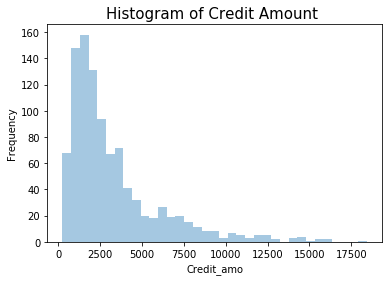

In [124]:
#created histogram for credit amount
sn.distplot( dataset.Credit_amo, kde = False )
plt.title( "Histogram of Credit Amount ", fontsize = 15)
plt.ylabel( "Frequency")

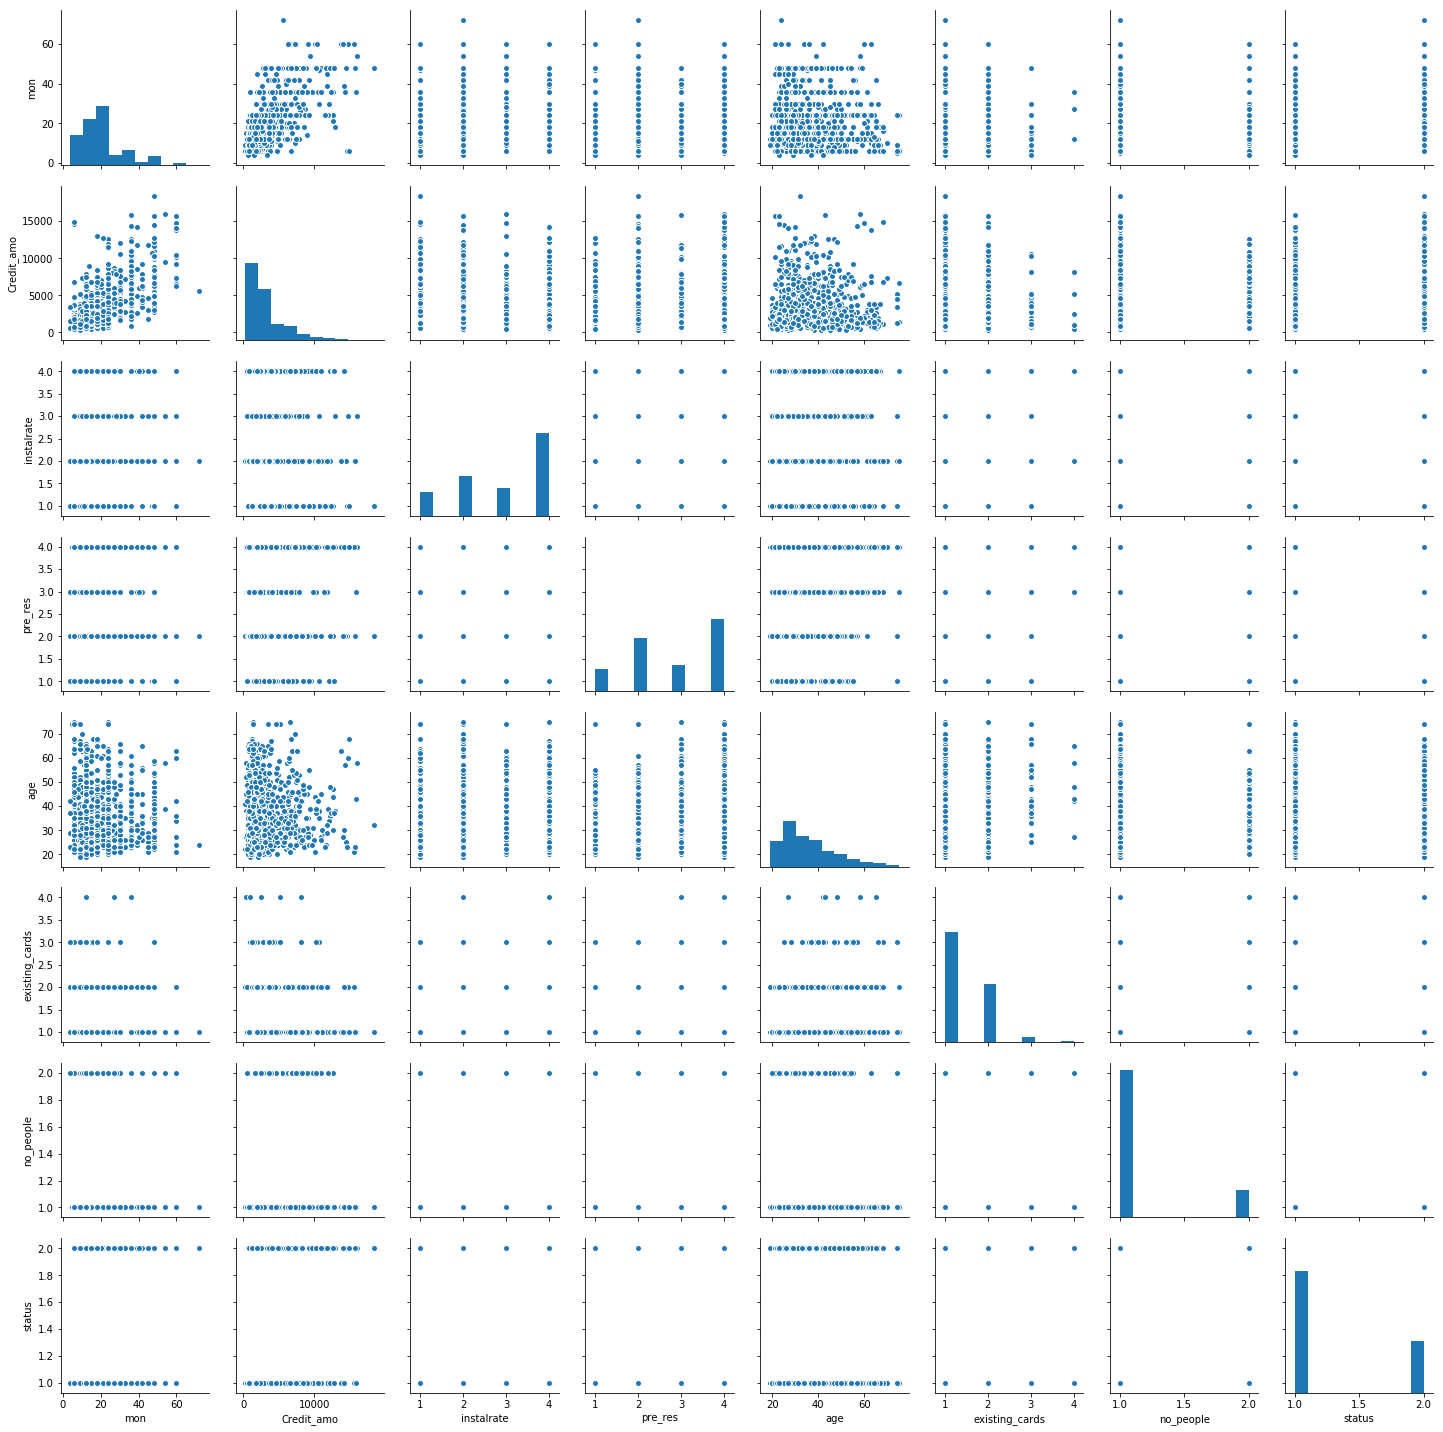

In [126]:
#created pairplot to view data  

sn.pairplot(dataset)

In [152]:

X = list(dataset.columns)
X.remove("status")
#to make output value  binary represenations 0-good 1-bad
Y = dataset.status-1
type(dataset)

pandas.core.frame.DataFrame

In [153]:
#creating dummies for X (catagorical variable present in X)
X= pd.get_dummies(dataset[X],drop_first =True)
X

,mon,Credit_amo,instalrate,pre_res,age,existing_cards,no_people,chek_acc_A12,chek_acc_A13,chek_acc_A14,...,property_A124,installment_A142,installment_A143,Housing_A152,Housing_A153,job_A172,job_A173,job_A174,telephn_A192,for_work_A202
0,6,1169,4,4,67,2,1,0,0,0,...,0,0,1,1,0,0,1,0,1,0
1,48,5951,2,2,22,1,1,1,0,0,...,0,0,1,1,0,0,1,0,0,0
2,12,2096,2,3,49,1,2,0,0,1,...,0,0,1,1,0,1,0,0,0,0
3,42,7882,2,4,45,1,2,0,0,0,...,0,0,1,0,1,0,1,0,0,0
4,24,4870,3,4,53,2,2,0,0,0,...,1,0,1,0,1,0,1,0,0,0
5,36,9055,2,4,35,1,2,0,0,1,...,1,0,1,0,1,1,0,0,1,0
6,24,2835,3,4,53,1,1,0,0,1,...,0,0,1,1,0,0,1,0,0,0
7,36,6948,2,2,35,1,1,1,0,0,...,0,0,1,0,0,0,0,1,1,0
8,12,3059,2,4,61,1,1,0,0,1,...,0,0,1,1,0,1,0,0,0,0
9,30,5234,4,2,28,2,1,1,0,0,...,0,0,1,1,0,0,0,1,0,0


In [154]:
#spliting the dataset into train and test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [155]:
#building the random forest classifier 
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 500, criterion = 'entropy', random_state = 0)

In [156]:
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [157]:
#predictive  values for test set 
y_pred = classifier.predict(X_test)
y_pred


array([1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [158]:
#building ROC curve 
import matplotlib.pyplot as plt
from sklearn import metrics
def roccurve(y_values, y_preds_proba):
    fpr, tpr, _ = metrics.roc_curve(y_values, y_preds_proba)
    xx = np.arange(101) / float(100)
    aur = metrics.auc(fpr,tpr)

    plt.xlim(0, 1.0)
    plt.ylim(0, 1.25)
    plt.plot([0.0, 0.0], [0.0, 1.0], color='green', linewidth=8)
    plt.plot([0.0, 1.0], [1.0, 1.0], color='green', label='Perfect Model', linewidth=4)
    plt.plot(xx,xx, color='blue', label='Random Model')
    plt.plot(fpr,tpr, color='red', label='User Model')
    plt.title("ROC Curve - AUR value ="+str(aur))
    plt.xlabel('% false positives')
    plt.ylabel('% true positives')
    plt.legend()
    plt.show()

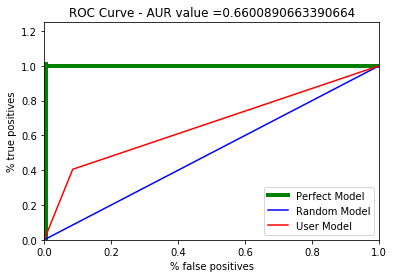

In [159]:
roccurve(y_values=y_test, y_preds_proba=y_pred)

In [131]:
#accuracy of the model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  
print(accuracy_score(y_test, y_pred))

[[161  15]
 [ 44  30]]
             precision    recall  f1-score   support

          1       0.79      0.91      0.85       176
          2       0.67      0.41      0.50        74

avg / total       0.75      0.76      0.74       250

0.764
